<a href="https://colab.research.google.com/github/wzy816/fundamentals/blob/master/026.k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

def k_means(dataset, number_of_clusters, max_step):
    N, d = dataset.shape

    # 初始化质心，随机选取 number_of_clusters 个数据点
    i = np.random.randint(0, N, number_of_clusters)
    centers = dataset[i,:]
    
    # 初识化每个数据点到质心的距离
    distance = np.zeros((N,number_of_clusters))
    
    # 初始化每个数据点对应的质心编号
    clusters = np.zeros(N, dtype=np.int32)
    
    
    step = 0
    converged = False
    while not converged and step<max_step:
        print('step',step, end=' ')
        
        # 对数据集的每个数据点，计算对每个质心与数据点之间的距离
        for c in range(number_of_clusters):
            distance[:,c] = np.power(dataset-centers[c,:],2).sum(1)

        # 每个数据点对应的最近的质心为新的质心
        new_clusters = np.argmin(distance, axis=1)
        
        # 如果质心的对应关系未变，则收敛
        diff = np.not_equal(clusters, new_clusters).sum()
        if diff == 0:
            converged = True
        print('diff', diff)
        clusters = new_clusters
        
        # 用对应这个质心的数据点的平均值，重新定义该质心位置
        for c in range(number_of_clusters):
            centers[c,:] = dataset[clusters == c,:].mean()
            
        step = step+1
    
    return centers

step 0 diff 100
step 1 diff 0


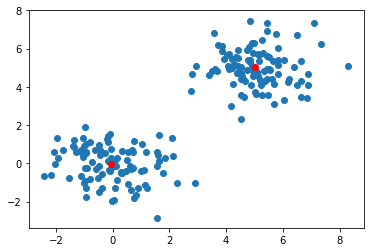

In [24]:
arr1 = np.random.normal(0,1,(100,2))
arr2 = np.random.normal(5,1,(100,2))
arr = np.concatenate((arr1,arr2), axis=0)
plt.scatter(arr[:,0],arr[:,1])

centers = k_means(arr,2,100)
plt.scatter(centers[:,0],centers[:,1],c='red')